In [1]:
#@title Librerias
from scipy.interpolate import lagrange
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Pérez
*Métodos computacionales 2024-II*

---

### **Funciones diferencias finitas, dervidada de 5 puntos, derivada a 3 puntos**

In [2]:
def five_point_derivative(x, y, h = 0.5):

  """
  Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.

  Parámetros:
  - y: función a derivar.
  - x: array de puntos donde evaluar la derivada.
  - h: paso entre puntos en el array x.

  Retorna:
  - Array de las derivadas aproximadas en cada punto de x.
  """


  diff = []
  for i in range(len(x)):

    if i == 0 and len(x) != 1:
      dx = (-25*y(x[i]) + 48*y(x[i] + h)-36*y(x[i] + 2*h)+16*y(x[i] + 3*h) - 3*y(x[i] + 4*h))/(12*h)

    if (i != 0 and i != len(x)) or len(x) == 1:
      dx = (y(x[i] - 2*h)- 8*y(x[i] - h) + 8*y(x[i] + h) - y(x[i]+ 2*h))/(12*h)

    if i == len(x)-1 and i != 0:
      dx = (25*y(x[i]) - 48*y(x[i] - h) + 36*y(x[i] - 2*h) - 16*y(x[i] - 3*h) + 3*y(x[i] - 4*h))/(12*h)

    diff.append(dx)



  return diff

def three_point_derivative(x, y, h = 0.5):

  """
  Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.

  Parámetros:
  - y: función a derivar.
  - x: array de puntos donde evaluar la derivada.
  - h: paso entre puntos en el array x.

  Retorna:
  - Array de las derivadas aproximadas en cada punto de x.
  """

  diff = []

  for i in range(len(x)):

    if i == 0 and len(x) != 1:
      dx = (-3*y(x[i]) + 4*y(x[i] + h) - y(x[i] + 2*h))/(2*h)

    if (i != 0 and i != len(x)) or len(x) == 1:
      dx = (y(x[i] + h) - y(x[i] - h))/(2*h)

    if i == len(x)-1 and i != 0:
      dx = (3*y(x[i]) - 4*y(x[i] - h) + y(x[i] - 2*h))/(2*h)

    diff.append(dx)


  return diff



def finite_diff(x, y, h = 0.5):

  """
  Calcula las diferencias finitas para una función f en un conjunto de puntos x con paso h.

  Parámetros:
  - y: función a derivar.
  - x: array de puntos donde evaluar la derivada.
  - h: paso entre puntos en el array x.

  Retorna:
  - Array de las derivadas aproximadas en cada punto de x.
  """

  diff = []
  for i in range(len(x)):

    if i == 0 and len(x) != 1:
      dx = (- y(x[i]) + y(x[i] + h))/(h)

    if (i != 0 and i != len(x)) or len(x) == 1:
      dx = (y(x[i] + h) - y(x[i] - h))/(2*h)

    if i == len(x)-1 and i != 0:
      dx = (y(x[i]) - y(x[i] - h))/(h)

    diff.append(dx)


  return diff


# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f'(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [3]:
def centrada5(f, h):
  g = lambda x: (y(x - 2*h)- 8*y(x - h) + 8*y(x + h) - y(x + 2*h))/(12*h)
  return g

def forward_diff5(f, h):
  g = lambda x: (-25*y(x) + 48*y(x + h)-36*y(x + 2*h) + 16*y(x + 3*h) - 3*y(x + 4*h))/(12*h)
  return g

def backward_diff5(f, h):
  g = lambda x: (25*y(x) - 48*y(x - h) + 36*y(x - 2*h) - 16*y(x - 3*h) + 3*y(x - 4*h))/(12*h)
  return g

El error asociado a esta aproximacion con h = 0.05 es de 0.0007738721282938843 veamos como se puede mejorar este error 
En la gráfica vemos que el error disminuyee conforme
h es menor pero en los valores de h mas pequeños
el error comienza a crecer de nuevo de acuerdo a las gráficas propuestas
esto es debido al problema que conlleva dividir por valores muy pequeños computacionalmente


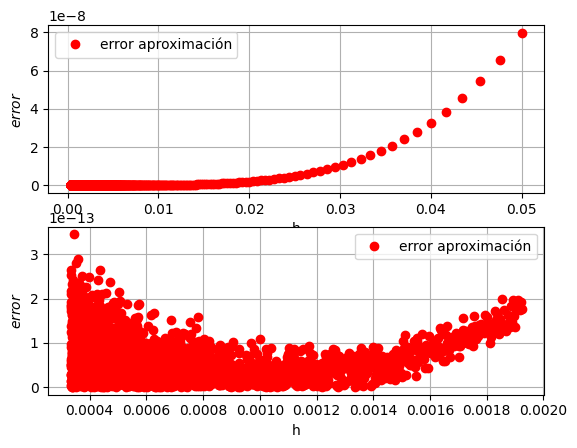

In [4]:
y = lambda x: np.cos(x)

d_prima = five_point_derivative([np.pi/8], y, 0.5)

print(f"""El error asociado a esta aproximacion con h = 0.05 es de {abs(d_prima[0] - (-np.sin(np.pi/8)))} veamos como se puede mejorar este error """)


#h = 0.05
hl = []
err = []
for i in range(20,3000):
  h = 1/i
  s = five_point_derivative([np.pi/8], y, h)
  error = abs(s[0] - (-np.sin(np.pi/8)))
  hl.append(h)
  err.append(error)


fig, ax = plt.subplots(2)

ax[0].plot(hl, err, 'ro', label = 'error aproximación')
ax[0].set_xlabel('h')
ax[0].set_ylabel('$error$')
ax[0].grid()
ax[0].legend()


ax[1].plot(hl[500:], err[500:], 'ro', label = 'error aproximación')
ax[1].set_xlabel('h')
ax[1].set_ylabel('$error$')
ax[1].grid()
ax[1].legend()

print("""En la gráfica vemos que el error disminuyee conforme
h es menor pero en los valores de h mas pequeños
el error comienza a crecer de nuevo de acuerdo a las gráficas propuestas
esto es debido al problema que conlleva dividir por valores muy pequeños computacionalmente""")



#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `sympy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [5]:
x = np.linspace(1.8, 2.2, 6)

f = lambda s : s*np.exp(s)
f_prim = lambda s: (s+1)*np.exp(s)

# encontremos la derivada de f(x) con la funcion ya calculada anteriormente

df = finite_diff(x, f, 10e-5)

# Encontremos el polinomio de interpolacion asociado a estos puntos

lag_df = lagrange(x, df) #polinomio interpolador de f'(x)'

# Asi, podemos encontrar la segunda derivada de f

d2f = finite_diff(x, lag_df, 10e-5)
lag_d2f = lagrange(x, d2f) #Polinomio interpolador de f''(x)

print(f"""Como primera aproximacion y h = 10e-5:
f(2.0) = {round(f(2.0), 4)}
f'(2.0) = {round(lag_df(2.0), 4)}
f''(2.0) = {round(lag_d2f(2.0), 4)}
      """)


# calculemos el f'(2.0) y f''(2.0) con np.gradient

d_np = np.gradient(f(x), x)
pol_dnp = lagrange(x, d_np)

d_2np = np.gradient(d_np, x)
pol_d2np = lagrange(x, d_2np)

vdnp = pol_dnp(2.0)

vd2np = pol_d2np(2.0)


# Ahora veamos como varia el error de nuestra aproximacion con h dierentes

h = np.linspace(0.01, 0.1, 10)
ed_f = []
ed_2f = []
for i in h:
  dfh = finite_diff(x, f, i) # diferencias finitas de 5 puntos para f(x)
  lag_hdf = lagrange(x, dfh) #polinomio interpolador de f'(x)'

  # Asi, podemos encontrar la segunda derivada de f

  d2fh = finite_diff(x, lag_hdf, i) # dierencias finitas para f'(x)
  lag_d2fh = lagrange(x, d2fh) #Polinomio interpolador de f''(x)

  v = lag_hdf(2.0)
  v2 = lag_d2fh(2.0)

  errord = abs(v - vdnp)
  errord2 = abs(v2 - vd2np)

  ed_f.append(errord)
  ed_2f.append(errord2)

print(f"""Con np.gradient:
f(2.0) = {round(f(2.0), 4)}
f'(2.0) = {round(vdnp, 4)}
f''(2.0) = {round(vd2np, 4)}
      """)

Como primera aproximacion y h = 10e-5:
f(2.0) = 14.7781
f'(2.0) = 22.1672
f''(2.0) = 29.556
      
Con np.gradient:
f(2.0) = 14.7781
f'(2.0) = 22.1996
f''(2.0) = 30.7733
      


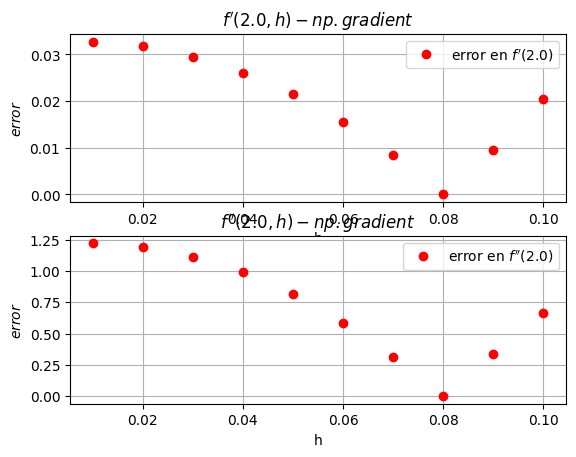

In [6]:
# Grafiquemos
fig, ax = plt.subplots(2)

ax[0].plot(h, ed_f, 'ro', label = "error en $f'(2.0)$")
ax[0].set_title("$f'(2.0, h) - np.gradient$")
ax[0].set_xlabel('h')
ax[0].set_ylabel('$error$')
ax[0].grid()
ax[0].legend()


ax[1].plot(h, ed_2f, 'ro', label = "error en $f''(2.0)$")
ax[1].set_title("$f''(2.0, h) - np.gradient$")
ax[1].set_xlabel('h')
ax[1].set_ylabel('$error$ ')
ax[1].grid()
ax[1].legend()

In [7]:
print("En el rango dado me inclinaria por tomar el h = 0.08 ya que minimiza el error f''(2.0) y f'(2.0) ")

En el rango dado me inclinaria por tomar el h = 0.08 ya que minimiza el error f''(2.0) y f'(2.0) 


#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [8]:
# la primera derivada del punto anterior fue encontrada mediante el uso diferencias finitas, se hará la comparacion con respecto a los otros metodos
h = 0.08 # h que optimiza la precisión
df = finite_diff(x, f, h)
df_5 = five_point_derivative(x, f, h) # derivada de cinco puntos
df_3 = three_point_derivative(x, f, h) # derivada de tres puntos

# Encontremos el polinomio de interpolacion asociado a estos puntos

lag_df5 = lagrange(x, df_5) #polinomio interpolador de f'(x) con 5 puntos
lag_df3 = lagrange(x, df_3) #polinomio interpolador de f'(x) con 3 puntos

# veamos el error de cada polinomio interpolador de f'(2.0)

error_5dif = abs(lag_df(2.0) - lag_df5(2.0))
error_3dif = abs(lag_df(2.0) - lag_df3(2.0))
error_53 = abs(lag_df3(2.0) - lag_df5(2.0))


print(f"""-Error diferencias finitas y derivada a 5 puntos : {error_5dif}

-Error diferencias finitas y derivada a 3 puntos : {error_3dif}

-# Error derivada a 3 puntos y derivada a 5 puntos : {error_53}
      """)






-Error diferencias finitas y derivada a 5 puntos : 7.032277062535286e-05

-Error diferencias finitas y derivada a 3 puntos : 0.03661079192534089

-# Error derivada a 3 puntos y derivada a 5 puntos : 0.036681114695966244
      
